<a href="https://colab.research.google.com/github/changsin/Medium/blob/main/notebooks/squid_mugunghwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Squid Game - Red Light, Green Light

In [4]:
!pip install -q youtube-dl

     |████████████████████████████████| 1.9 MB 5.2 MB/s 


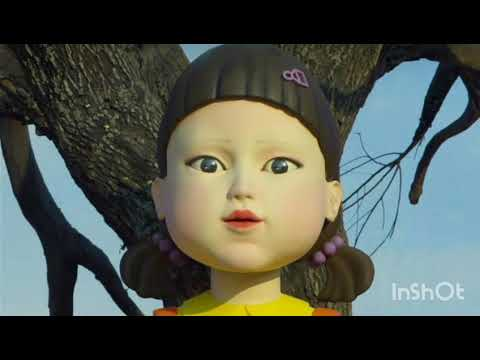

In [5]:
from IPython.display import YouTubeVideo

squid_mugunghwa = "squid_mugunghwa"
squid_mugunghwa_id = 'NPCD8XwHUR0'
YouTubeVideo(squid_mugunghwa_id)

In [15]:
def download_youtube(youtube_id, save_filename):
  !youtube-dl -f 'bestvideo[ext=mp4]' --output $save_filename".%(ext)s" https://www.youtube.com/watch?v=$youtube_id

download_youtube(squid_mugunghwa_id, squid_mugunghwa)

[youtube] NPCD8XwHUR0: Downloading webpage
[download] squid_mugunghwa.mp4 has already been downloaded
[download] 100% of 1.21MiB


In [21]:
!youtube-dl -f 'bestaudio[ext=mp3]' --output $squid_mugunghwa.mp3 https://www.youtube.com/watch?v=NPCD8XwHUR0 --extract-audio --audio-format mp3'

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [27]:
!youtube-dl -f 140 https://www.youtube.com/watch?v=NPCD8XwHUR0

[youtube] NPCD8XwHUR0: Downloading webpage
[download] Destination: Squid Game ringtone 오징어 게임  - 무공화 꽃이 피었습니다-NPCD8XwHUR0.m4a
[download] 100% of 550.08KiB in 00:00
[ffmpeg] Correcting container in "Squid Game ringtone 오징어 게임  - 무공화 꽃이 피었습니다-NPCD8XwHUR0.m4a"


In [19]:
!youtube-dl -F  https://www.youtube.com/watch?v=NPCD8XwHUR0

[youtube] NPCD8XwHUR0: Downloading webpage
[info] Available formats for NPCD8XwHUR0:
format code  extension  resolution note
249          webm       audio only tiny   47k , webm_dash container, opus @ 47k (48000Hz), 202.50KiB
250          webm       audio only tiny   59k , webm_dash container, opus @ 59k (48000Hz), 253.04KiB
251          webm       audio only tiny  116k , webm_dash container, opus @116k (48000Hz), 492.57KiB
140          m4a        audio only tiny  129k , m4a_dash container, mp4a.40.2@129k (44100Hz), 550.08KiB
160          mp4        254x144    144p   25k , mp4_dash container, avc1.4d400c@  25k, 30fps, video only, 108.82KiB
278          webm       254x144    144p   26k , webm_dash container, vp9@  26k, 30fps, video only, 112.80KiB
242          webm       424x240    240p   36k , webm_dash container, vp9@  36k, 30fps, video only, 153.04KiB
133          mp4        424x240    240p   43k , mp4_dash container, avc1.4d4015@  43k, 30fps, video only, 183.63KiB
243          webm 

In [33]:
# ffmpeg -i filename.mp4 filename.mp3


def to_mp3(mp4):
  print("Converting", mp4)
  !ffmpeg -i $mp4 -t 6 -q:a 8 $mp4".mp3"

to_mp3('/content/squid_mugunghwa.m4a')

Converting /content/squid_mugunghwa.m4a
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enab

In [51]:
from IPython.display import Audio
# from scipy.io import wavfile

def play_audio(filename):
  return Audio(filename, autoplay=True)

play_audio('squid_mugunghwa.m4a.mp3')

In [34]:
import base64
import html
import io
import time

from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
from PIL import Image
import cv2

def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }

    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def take_live_photo(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

In [32]:
def js_reply_to_image(js_reply):
    """
    input: 
          js_reply: JavaScript object, contain image from webcam

    output: 
          image_array: image array from webcam
    """
    jpeg_bytes = base64.b64decode(js_reply['img'].split(',')[1])
    image_PIL = Image.open(io.BytesIO(jpeg_bytes))
    return np.asarray(image_PIL)

def image_to_bytes(image_openpose):
    image = Image.fromarray(image_openpose, 'RGB')
    iobuf = io.BytesIO()
    image.save(iobuf, format='png')
    drawing_bytes = 'data:image/png;base64,{}'.format((str(base64.b64encode(iobuf.getvalue()), 'utf-8')))
    return drawing_bytes

In [36]:
import time

from IPython.display import clear_output 

import IPython.display as ipd

start_input()
label_html = 'Capturing...'
img_data = ''

# for i in range(5):
while True:
  js_reply = take_live_photo(label_html, img_data)
  if not js_reply:
      break

  image = js_reply_to_image(js_reply)

  # humans = e.inference(image,
  #                      resize_to_default=(w > 0 and h > 0),
  #                      upsample_size=4.0)
  # image_openpose = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)

  # drawing_bytes = image_to_bytes(image_openpose)
  drawing_bytes = image_to_bytes(image)
  img_data = drawing_bytes
  
  ipd.display(ipd.Audio('squid_mugunghwa.m4a.mp3', autoplay=True))

  ipd.set_matplotlib_close(close=True)


  time.sleep(8)

  clear_output()



MessageError: ignored